In [3]:
import torch

In [4]:
# setup device to use
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [5]:
device


device(type='cuda')

In [6]:
import yaml
from types import SimpleNamespace

# load config
# config_path = "/export/home/workspace/dreambooth/diffusers/configs/zerobooth.yaml"
config_path = "/export/home/workspace/dreambooth/diffusers/configs/zerobooth_openimage.yaml"
config = yaml.load(open(config_path, "r"), Loader=yaml.FullLoader)
config = SimpleNamespace(**config)


In [7]:
print(config)

namespace(adam_beta1=0.9, adam_beta2=0.999, adam_epsilon='1e-08', adam_weight_decay='1e-02', gradient_accumulation_steps=2, image_size=224, learning_rate='2e-6', local_rank=-1, logging_dir='logs', logging_steps=200, lr_scheduler='constant', lr_warmup_steps=0, max_grad_norm=20.0, max_train_steps=90000, mixed_precision='no', model={'train_text_encoder': True, 'train_unet': True, 'pretrained_model_name_or_path': 'runwayml/stable-diffusion-v1-5', 'revision': None, 'text_model': 'bert-base-uncased', 'pretrained': '/export/share/junnan-li/BLIP2/checkpoint/clip_q16.pth', 'vision_model': 'clip', 'image_size': 224, 'num_query_token': 16, 'max_text_length': 32, 'embed_dim': 256, 'num_proj_query_token': 32, 'use_grad_checkpointing': True}, output_dir='output/pretrain-20230212-unet-textenc-v1.5-small-region', save_steps=5000, scale_lr=False, seed=1337, tgt_image_size=512, train_batch_size=1)


In [8]:
from modeling_zerobooth import ZeroBooth

model = ZeroBooth(config=config.model)


Creating model
_IncompatibleKeys(missing_keys=[], unexpected_keys=['visual.proj', 'visual.ln_post.weight', 'visual.ln_post.bias', 'visual.transformer.resblocks.23.attn.in_proj_weight', 'visual.transformer.resblocks.23.attn.in_proj_bias', 'visual.transformer.resblocks.23.attn.out_proj.weight', 'visual.transformer.resblocks.23.attn.out_proj.bias', 'visual.transformer.resblocks.23.ln_1.weight', 'visual.transformer.resblocks.23.ln_1.bias', 'visual.transformer.resblocks.23.mlp.c_fc.weight', 'visual.transformer.resblocks.23.mlp.c_fc.bias', 'visual.transformer.resblocks.23.mlp.c_proj.weight', 'visual.transformer.resblocks.23.mlp.c_proj.bias', 'visual.transformer.resblocks.23.ln_2.weight', 'visual.transformer.resblocks.23.ln_2.bias'])
freeze class_embedding
freeze positional_embedding
freeze conv1.weight
freeze ln_pre.weight
freeze ln_pre.bias
freeze transformer.resblocks.0.attn.in_proj_weight
freeze transformer.resblocks.0.attn.in_proj_bias
freeze transformer.resblocks.0.attn.out_proj.weight


load checkpoint from /export/share/junnan-li/BLIP2/checkpoint/clip_q16.pth
_IncompatibleKeys(missing_keys=['visual_encoder.class_embedding', 'visual_encoder.positional_embedding', 'visual_encoder.conv1.weight', 'visual_encoder.ln_pre.weight', 'visual_encoder.ln_pre.bias', 'visual_encoder.transformer.resblocks.0.attn.in_proj_weight', 'visual_encoder.transformer.resblocks.0.attn.in_proj_bias', 'visual_encoder.transformer.resblocks.0.attn.out_proj.weight', 'visual_encoder.transformer.resblocks.0.attn.out_proj.bias', 'visual_encoder.transformer.resblocks.0.ln_1.weight', 'visual_encoder.transformer.resblocks.0.ln_1.bias', 'visual_encoder.transformer.resblocks.0.mlp.c_fc.weight', 'visual_encoder.transformer.resblocks.0.mlp.c_fc.bias', 'visual_encoder.transformer.resblocks.0.mlp.c_proj.weight', 'visual_encoder.transformer.resblocks.0.mlp.c_proj.bias', 'visual_encoder.transformer.resblocks.0.ln_2.weight', 'visual_encoder.transformer.resblocks.0.ln_2.bias', 'visual_encoder.transformer.resblocks

In [359]:
# load_from = "/export/home/workspace/dreambooth/diffusers/output/pretrain-20221211-bs=3-nq=8-prenorm-norm_clip=all_tune=4/65000"
# load_from = "/export/home/workspace/dreambooth/diffusers/output/pretrain-20221225-unet-only/40000"
# load_from = "/export/home/workspace/dreambooth/diffusers/output/pretrain-20221225-unet-only/70000"
# load_from = "/export/home/workspace/dreambooth/diffusers/output/pretrain-20221227-unet-textenc-coco/40000"
# load_from = "/export/home/workspace/dreambooth/diffusers/output/pretrain-20221230-unet-textenc-coco-v1.5/60000"
# load_from = "/export/home/workspace/dreambooth/diffusers/output/pretrain-20221230-unet-textenc-coco-v1.5/40000"
# load_from = "/export/home/workspace/dreambooth/diffusers/output/pretrain-20221231-unet-textenc-v1.5/40000"
# load_from = "/export/home/workspace/dreambooth/diffusers/output/pretrain-20230111-openimage-unet-only/75000"
# load_from = "/export/home/workspace/dreambooth/diffusers/output/pretrain-20230111-openimage/40000"
# load_from = "/export/home/workspace/dreambooth/diffusers/output/pretrain-20230110-openimage-fullimage/35000"
# load_from = "/export/home/workspace/dreambooth/diffusers/output/pretrain-20230110-openimage/35000"
# load_from = "/export/home/workspace/dreambooth/diffusers/output/pretrain-20230110-openimage/45000"
# load_from = "/export/home/workspace/dreambooth/diffusers/output/pretrain-20230111-openimage/45000"
# load_from = "/export/home/workspace/dreambooth/diffusers/output/pretrain-20230108-openimage-complete/40000"
# load_from = "/export/home/workspace/dreambooth/diffusers/output/pretrain-20230112-openimage-refer-only/40000"
# load_from = "/export/home/workspace/dreambooth/diffusers/output/pretrain-20230110-openimage-fullimage/40000"
# load_from = "/export/home/workspace/dreambooth/diffusers/output/pretrain-20221227-unet-only-coco/50000"
# load_from = "/export/home/workspace/dreambooth/diffusers/output/pretrain-20230108-openimage/50000"
# load_from = "/export/home/workspace/dreambooth/diffusers/output/pretrain-20230108-openimage-refer/35000/"
# load_from = "/export/home/workspace/dreambooth/diffusers/output/pretrain-20230108-openimage/35000"
# load_from = "/export/home/workspace/dreambooth/diffusers/output/pretrain-20230216-unet-textenc-v1.5-capfilt6b7/65000"

# BEST ONES
# load_from = "/export/home/workspace/dreambooth/diffusers/output/pretrain-20230111-openimage/40000"
# load_from = "/export/home/workspace/dreambooth/diffusers/output/pretrain-20230208-unet-textenc-v1.5/60000"
# load_from = "/export/home/workspace/dreambooth/diffusers/output/pretrain-20230208-unet-textenc-v1.5/5000"
# load_from = "/export/home/workspace/dreambooth/diffusers/output/pretrain-20230208-unet-textenc-v1.5/60000"
# load_from = "/export/home/workspace/dreambooth/diffusers/output/pretrain-20230216-unet-textenc-v1.5-capfilt6b7-fullmask/70000"
# load_from = "/export/home/workspace/dreambooth/diffusers/output/pretrain-20230216-unet-textenc-v1.5-capfilt6b7-fullmask/80000"
# load_from = "/export/home/workspace/dreambooth/diffusers/output/pretrain-20230216-unet-textenc-v1.5-capfilt6b7-fullmask/55000"
# load_from = "/export/home/workspace/dreambooth/diffusers/output/pretrain-20230218-unet-textenc-v1.5-capfilt6b7-fullmask-rr0.75/80000"
# load_from = "/export/home/workspace/dreambooth/diffusers/output/pretrain-20230218-unet-textenc-v1.5-capfilt6b7-fullmask-rr1/55000"
# load_from = "/export/home/workspace/dreambooth/diffusers/output/pretrain-20230218-unet-textenc-v1.5-capfilt6b7-fullmask-rr1/75000"
# load_from = "/export/home/workspace/dreambooth/diffusers/output/pretrain-20230222-unet-textenc-v1.5-capfilt6b7-fullmask-synbbox-rr0.5/60000"
load_from = "/export/home/workspace/dreambooth/diffusers/output/pretrain-20230222-unet-textenc-v1.5-capfilt6b7-fullmask-synbbox-rr0.33/60000"
# load_from = "/export/home/workspace/dreambooth/diffusers/output/pretrain-20230222-unet-textenc-v1.5-capfilt6b7-fullmask-synbbox-rr0.5/45000"
# load_from = "/export/home/workspace/dreambooth/diffusers/output/pretrain-20230222-unet-textenc-v1.5-capfilt6b7-fullmask-synbbox-rr0.5/15000"
# load_from = "/export/home/workspace/dreambooth/diffusers/output/pretrain-20230218-unet-textenc-v1.5-capfilt6b7-fullmask-rr1/55000"
# load_from = "/export/home/workspace/dreambooth/diffusers/output/pretrain-20230218-unet-textenc-v1.5-capfilt6b7-fullmask-rr1/15000"
# load_from = "/export/home/workspace/dreambooth/diffusers/output/pretrain-20230211-unet-textenc-v1.5/60000"
# load_from = "/export/home/workspace/dreambooth/diffusers/output/pretrain-20230208-unet-textenc-v1.5/60000"
# load_from = "/export/home/workspace/dreambooth/diffusers/output/pretrain-20230216-unet-textenc-v1.5-capfilt6b7/70000"

# load_from = "/export/home/workspace/dreambooth/diffusers/output/pretrain-20230212-unet-textenc-v1.5-small-region/90000"

model.load_checkpoint(load_from)
model.to(device)
model.eval()


ZeroBooth(
  (blip): BLIP(
    (visual_encoder): VisionTransformer(
      (conv1): Conv2d(3, 1024, kernel_size=(14, 14), stride=(14, 14), bias=False)
      (ln_pre): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
      (transformer): Transformer(
        (resblocks): Sequential(
          (0): ResidualAttentionBlock(
            (attn): MultiheadAttention(
              (out_proj): NonDynamicallyQuantizableLinear(in_features=1024, out_features=1024, bias=True)
            )
            (ln_1): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
            (mlp): Sequential(
              (c_fc): Linear(in_features=1024, out_features=4096, bias=True)
              (gelu): QuickGELU()
              (c_proj): Linear(in_features=4096, out_features=1024, bias=True)
            )
            (ln_2): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
            (drop_path): Identity()
          )
          (1): ResidualAttentionBlock(
            (attn): MultiheadAttention(
 

In [360]:
from PIL import Image
import requests

# load image
def load_image(path):
    try:
        img = Image.open(path).convert("RGB")
    except:
        img = Image.open(requests.get(path, stream=True).raw).convert("RGB")
    return img


In [361]:
def display_img(img):
    w, h = img.size
    f = 368 / max(w, h)

    display(img.resize((int(w * f), int(h * f))))


a dog as decoration on a cup,as decoration on a cup,as decoration on a cup,as decoration on a cup,as decoration on a cup,as decoration on a cup,as decoration on a cup,as decoration on a cup,as decoration on a cup,as decoration on a cup,as decoration on a cup,as decoration on a cup,as decoration on a cup,as decoration on a cup,as decoration on a cup,as decoration on a cup,as decoration on a cup,as decoration on a cup,as decoration on a cup,as decoration on a cup


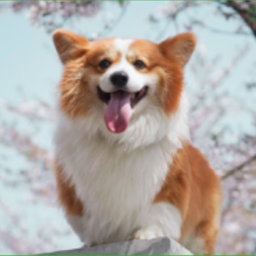

In [413]:
# negative_prompt = "out of frame, lowres, text, error, cropped, worst quality, low quality, jpeg artifacts, ugly, duplicate, morbid, mutilated, out of frame, extra fingers, mutated hands, poorly drawn hands, poorly drawn face, mutation, deformed, blurry, dehydrated, bad anatomy, bad proportions, extra limbs, cloned face, disfigured, gross proportions, malformed limbs, missing arms, missing legs, extra arms, extra legs, fused fingers, too many fingers, long neck, username, watermark, signature"
# negative_prompt = "car, blue, over-exposed, saturated, blur, out of frame, lowres, cropped, worst quality, low quality, jpeg artifacts, morbid, mutilated, out of frame, ugly, bad anatomy, bad proportions, deformed, blurry, duplicate"

# negative_prompt = "people, human, saturated, duplicate, out of frame, over-exposure, lowres, cropped, worst quality, low quality, jpeg artifacts, morbid, mutilated, out of frame, ugly, bad anatomy, bad proportions, deformed, blurry, duplicate"
negative_prompt = "over-exposure, saturated, duplicate, out of frame, lowres, cropped, worst quality, low quality, jpeg artifacts, morbid, mutilated, out of frame, ugly, bad anatomy, bad proportions, deformed, blurry, duplicate"

# subject = "vase"
# subject = "car, vehicle, sports car"
# subject = "car"
# subject = "dog"
# subject = "building"
# subject = "jetski"
# subject = "sofa"
# subject = "cap"
# subject = "bowl"
# subject = "dog"
# subject = "bronze sculpture"
# subject = "bowl"
# subject = "vase"
# subject = "glasses"
# subject = "sunglasses"
# subject = "toy character"
subject = "dog"
# subject = "zebra"

# caption = "a dog"
# caption = "a bowl"
# caption = "a dog"
# caption = "a tower"
# caption = "a car"
caption = "a dog"
# caption = "a vase"
# caption = "a sunglasses"
# caption = "a sofa"
# caption = "a cap"
# caption = "a avan gogh painting"
# caption = "a sleeping dog"
# caption = "a truck"
# caption = "a building"


# =========== background ============
# subprompt = "standing at the grand canyon"
# subprompt = "buried in the snow! lying down on the ground!"
# subprompt = "in syndey, view from a distance"
# subprompt = "in paris, view from a distance"
# subprompt = "placed on a red fabric"
subprompt = "near the river"
# subprompt = "in the outer space"
# subprompt = "outside the Louvre Museum, snowy ground, sunset, very peaceful"
# subprompt = "outside the grand canyon, snowy ground, sunset, very peaceful"
# subprompt = "outside the Louvre Museum, snowy ground, sunset, very peaceful"
# subprompt = "in front of eiffle tower"
# subprompt = "at the great wall"
# subprompt = "in front of the acropolis"
# subprompt = "under the water"
# subprompt = "in a wide snowy field, river in the background, very peaceful"
# subprompt = "in front of the acropolis"
# subprompt = "in a wooden dog house"
# subprompt = "at mountain fuji, cherry blossoms on the clouds, brilliant peaks, sunny, early morning, by by yoneyama mai, trending on artstation"
# subprompt = "at mountain fuji, cherry blossoms on the clouds, brilliant peaks, sunny, early morning, photorealistic"
# subprompt = "at the grand canyon, surrounded by desert mountains at sunset on mars, planet mars, moab, utah, a tilt shift photo by frederic church, trending on unsplash, hudson river school, 3 5 mm photo, photo taken with provia, national geographic photo"


# =========== medium ============
# subprompt = "marble sculpture"
# subprompt = "bronze sculpture"
# subprompt = "silver sculpture"
# subprompt = "fabric toy"
# subprompt = "made of lego"
# subprompt = "made of marble"
# subprompt = "made of bronze"
# subprompt = "3d low poly, low-resolution"
# subprompt = "in the style of minecraft"


# =========== style ===========
# subprompt = "midigliani painting"
# subprompt = "in the style of claymation"
# subprompt = "in the style of Alexander Calder sculptures"
# subprompt = "as a painting in the style of van gogh"
# subprompt = "with surreal background, plants and flowers, mexican art, naive art, by frida kahlo" # [BAD]
# subprompt = "watercolor painting"
# subprompt = "in the style of ink painting"
# subprompt = "painted pink"
# subprompt = "3d rendering"

# =========== appearance ==========
# subprompt = "wearing a white space suit"
# subprompt = "wearing a chinese armour"
# subprompt = "head-shot wearing sunglasses"
# subprompt = "wearing space helmet"
# subprompt = "on a skateboard"
# subprompt = "wearing a lakers cap"
# subprompt = "wearing a hat"
# subprompt = "eating ramen soup"
# subprompt = "in a bucket"
# subprompt = "in stormtropper suit"
# subprompt = "head-shot, wearing cool stylish glasses"
# subprompt = "wearing a superman suit"
# subprompt = "painted pink"
# subprompt = "painted black"
# subprompt = "with ramen in it"
# subprompt = "in the style of edvard munch's the scream"
# subprompt = "in the style of Tesla power armor realistic cyborg anthropomorphic scifi kirlian photography electric field glowing, cyberpunk, portrait art by donato giancola and greg rutkowski, realistic face, glowing in tesla electricity visible magnetic field, digital art, trending on artstation, symmetry"


# =========== gestures / poses ===========
# subprompt = "sleeping, lying down"
# subprompt = "jumping"
# subprompt = "getting a haircut"
# subprompt = "happily jumping"
# subprompt = "swimming underwater"
# subprompt = "from the back"


# =========== misc =============
subprompt = "as decoration on a cup"
# subprompt = "wearing nice cool sunglasses, at the grand canyon"
# subprompt = "seen from the back"
# subprompt = "worn on a bear face"

# subprompt = ""

prompt = caption + " " + ",".join([subprompt] *20)

print(prompt)

# ============ dogs & cats =============
# image_path = "/export/home/workspace/dreambooth/diffusers/data/dog-in-bucket.png"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/hat-dog.png"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/gold-little.png"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/big-gold.png"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/little-gold.png"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/NationalGeographic_2731043_4x3.webp"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/black-corgi-3.png"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/black-corgi.jpg"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/corgi-puppy.png"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/gold-retriever-in-red-car.jpeg"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/alvan-nee/alvan-nee-eoqnr8ikwFE-unsplash.jpeg"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/alvan-nee/alvan-nee-padded.png"
image_path = "/export/home/workspace/dreambooth/diffusers/data/df-dog.jpg"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/df-dog-2.jpg"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/dog-harness-1598455194.jpeg"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/Bernese-mountain-dog-grass.webp"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/dog-doorstep.png"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/blue-cat.png"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/cat-dog.webp"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/dog-at-garden.jpg"

# image_path = "/export/home/workspace/dreambooth/diffusers/data/df-cat.jpg"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/df-cat2.png"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/black-cat-in-the-wild.png"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/black-cat-wild.png"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/black-cat.png"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/sphnix-cat.jpg"

# ========== vehicle =========
# image_path = "/export/home/workspace/dreambooth/diffusers/data/cybertruck.png"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/miller-motor.png"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/df-car.jpg"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/bigbull.jpg"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/df-car-large.jpg"

# ========== misc =======
# image_path = "/export/home/workspace/dreambooth/diffusers/data/vase.png"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/bowl-ti.jpg"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/bowl-pink.jpg"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/bowl-qinghua.jpg"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/qinghua-bowl-small.jpg"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/bird-vase.jpg"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/brown-hat.jpg"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/rotten-tomato2.png"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/bizza-tower.jpg"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/red-tower.jpg"

# ========== bird =============
# image_path = "/export/home/workspace/dreambooth/diffusers/data/blue-jay.png"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/red-parrot.jpg"


# image_path = "/export/home/workspace/dreambooth/diffusers/data/running-retriever.png"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/00sl-pets-superJumbo.webp"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/cloth.jpg"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/toy.jpg"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/kettle.jpg"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/1676559131147.jpg"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/shutterstock_517026226.jpeg"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/sunglasses.png"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/bronze-sculpture.jpg"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/head-sculpture.jpg"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/glasses-wide.png"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/sf-cartoon.jpg"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/black-backpack.png"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/LV-backpack.png"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/shutterstock_517026226.jpeg"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/gold-retriever-in-red-car.jpeg"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/white-bg.png"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/pexels-karolina-grabowska-8947549.jpg"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/sphinix-ladder.png"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/Pembroke-Welsh-Corgi-standing-outdoors-in-the-fall.jpeg"

# image_path = "/export/home/workspace/dreambooth/diffusers/data/df-bottle.jpg"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/pexels-jay-pizzle-15489383.jpg"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/pexels-dids-1302292.jpg"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/pexels-anna-shvets-4587973.jpg"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/istockphoto-1311993425-170667a.jpeg"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/zebra.png"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/dog-car.jpg"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/pexels-lukas-582981.jpg"
# image_path = "https://upload.wikimedia.org/wikipedia/commons/4/41/Left_side_of_Flying_Pigeon.jpg"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/Left_side_of_Flying_Pigeon.jpg"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/WX20230218-010943@2x.png"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/avocado-sofa.jpg"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/50mile.png"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/muffin.png"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/jetski.png"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/yellow-hat.png"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/pexels-dominika-roseclay-1239422.jpg"
image = load_image(image_path)

display(image.resize((256, 256)))


In [414]:
config.image_size


224

In [415]:
from train_zerobooth import create_transforms

# create transforms
transforms = create_transforms(config)

inp_tsfm = transforms["inp_image_transform"]
txt_tsfm = transforms["text_transform"]


In [416]:
ctx_begin_pos = [
    len(
        model.tokenizer(
#             base_prompt,
            prompt,
            padding="do_not_pad",
        ).input_ids
    )
    - 1
]


In [417]:
samples = {
    "input_images": inp_tsfm(image).unsqueeze(0).to(device),
    "class_names": [txt_tsfm(subject)],
    "prompt": [txt_tsfm(prompt)],
    "ctx_begin_pos": [2],
#     "ctx_begin_pos": ctx_begin_pos
}


In [418]:
import random
import torch.backends.cudnn as cudnn
import numpy as np

100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 13.92it/s]


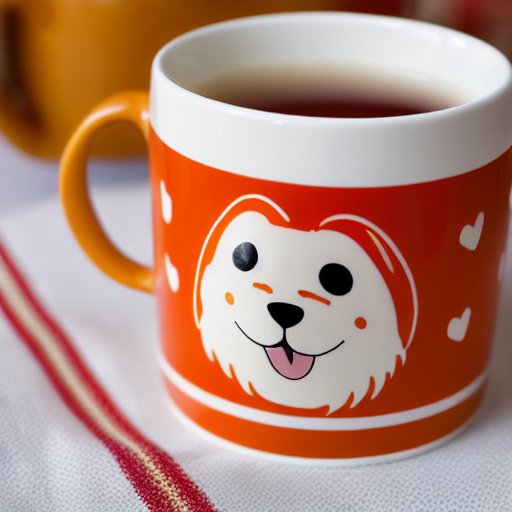

100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 13.96it/s]


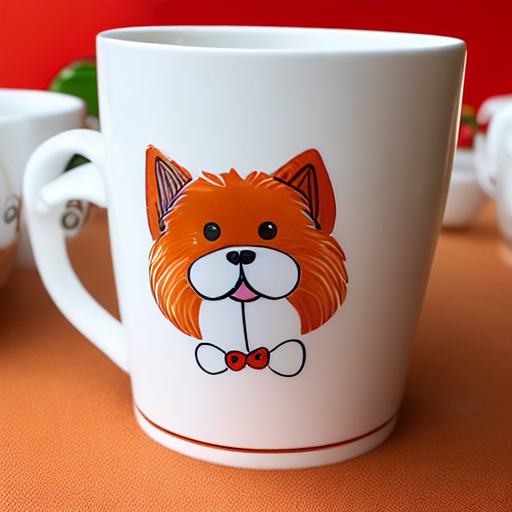

 72%|███████████████████████████████████████████████████████████████████████▎                           | 36/50 [00:02<00:01, 13.75it/s]

In [ ]:
import random
seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)

cudnn.benchmark = False
cudnn.deterministic = True


for i in range(10):
    output = model.generate(
        samples,
        # seed=387602220012,
        seed=18001101221,
#         seed=1111201211300,
#         seed=282911101110,
#         seed=3800706111011,
        guidance_scale=7.5,
#         guidance_scale=10,
        num_inference_steps=50,
        neg_prompt=negative_prompt,
        height=512,
        width=512,
#         embedding_weights=[1.0, 1.0]
#         height=768,
#         width=768
    )
    # output = model.generate_dual(samples,
    #     seed=387600409,
    #     guidance_scale=7.5,
    #     theta=4
    # )
    # output = model.generate(samples, seed=387658222, guidance_scale=7.5)

    display(output[0])
